<a href="https://colab.research.google.com/github/SreeramNithin/UNP-Projects/blob/main/IMDB_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re #used as a regular expression to find particular patterns and process it
import string #used to obtain information in the string and manipulate the string overall
import warnings
import re
from bs4 import BeautifulSoup
from wordcloud import WordCloud
from textblob import TextBlob
# plotting
import seaborn as sns
import matplotlib.pyplot as plt
# nltk
import nltk #a natural language processing toolkit module associated in anaconda
from nltk.corpus import stopwords
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,SnowballStemmer
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('omw-1.4')
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_extraction.text import CountVectorizer

%matplotlib inline
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
imdb=pd.read_csv('/content/train.csv')
print(imdb.shape)
imdb.head(40)

(90, 3)


,title,wiki_plot,imdb_plot
0,The Godfather,"On the day of his only daughters wedding, Vito...","In late summer , guests are gathered for the w..."
1,The Shawshank Redemption,"In , banker Andy Dufresne is convicted of murd...","In , Andy Dufresne (Tim Robbins), a banker in ..."
2,Schindler's List,"In , the Germans move Polish Jews into the Kra...",The relocation of Polish Jews from surrounding...
3,Raging Bull,"In a brief scene in , an aging, overweight Ita...","The film opens in , where an older and fatter ..."
4,Casablanca,It is early December . American expatriate Ric...,"In the early years of World War II, December ,..."
5,One Flew Over the Cuckoo's Nest,"In Oregon, Randle Patrick ""Mac"" McMurphy (Jack...","In Oregon, Randle Patrick McMurphy (Nicholson)..."
6,Gone with the Wind,Part Part Part On the eve of the Amer...,"The film opens in Tara, a cotton plantation ow..."
7,Citizen Kane,Orson Welles as Charles Foster Kane ...,"Its , and newspaper tycoon Charles Foster Kane..."
8,The Wizard of Oz,The film starts in sepia-tinted Kansas in the ...,Dorothy Gale (Judy Garland) is an orphaned tee...
9,Titanic,"In , treasure hunter Brock Lovett and his team...","In , treasure hunter Brock Lovett and his team..."


In [ ]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# Removing emojis
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\u005c"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

# Text-encoding: UTF-8 encoder
def to_unicode(text):
    if isinstance(text, float):
        text = str(text)
    if isinstance(text, int):
        text = str(text)
    if not isinstance(text, str):
        text = text.decode('utf-8', 'ignore')
    return text

# Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

# Removing the noisy text
def denoise_text(text):
    text = to_unicode(text)
    text = strip_html(text)
    text = re.sub(r"http\S+", "", text)
    text = remove_emoji(text)
    text = text.encode('ascii', 'ignore')
    text = to_unicode(text)
    text = remove_between_square_brackets(text)
    text = remove_special_characters(text)
    text = text.lower() # lower case 
    return text

In [ ]:
imdb.shape

(90, 3)

In [ ]:
imdb['imdb_plot'][1]

'In , Andy Dufresne (Tim Robbins), a banker in Maine, is convicted of murdering his wife and her lover, a golf pro. He is given two life sentences and sent to the notoriously harsh Shawshank Prison. Andy always claims his innocence, but his cold and measured demeanor led many to doubt his word.During the first night, the chief guard, Byron Hadley (Clancy Brown), savagely beats a newly arrived inmate because of his crying and hysterics. The inmate later dies in the infirmary because the prison doctor had left for the night. Meanwhile Andy remained steadfast and composed. Ellis Boyd Redding (Morgan Freeman), also known as Red, bet against others that Andy would be the one to break down first and loses a considerable amount of cash.About a month later, Andy approaches Red, who runs contraband inside the walls of Shawshank. He asks if Red could find him a rock hammer, an instrument he claims is necessary for his hobby of rock collecting and sculpting. Though other prisoners consider Andy "

In [ ]:
#IMDB_PLOT COLUMN
imdb['imdb_plot']=imdb['imdb_plot'].apply(denoise_text)
imdb['imdb_plot']=imdb['imdb_plot'].apply(remove_special_characters)
imdb['imdb_plot']=imdb['imdb_plot'].apply(remove_between_square_brackets)
imdb['imdb_plot']=imdb['imdb_plot'].apply(to_unicode)
imdb['imdb_plot']=imdb['imdb_plot'].apply(remove_emoji)
imdb['imdb_plot']=imdb['imdb_plot'].apply(strip_html)
imdb['imdb_plot'].head()
#WIKI_PLOT_COLUMN
imdb['wiki_plot']=imdb['wiki_plot'].apply(denoise_text)
imdb['wiki_plot']=imdb['wiki_plot'].apply(remove_special_characters)
imdb['wiki_plot']=imdb['wiki_plot'].apply(remove_between_square_brackets)
imdb['wiki_plot']=imdb['wiki_plot'].apply(to_unicode)
imdb['wiki_plot']=imdb['wiki_plot'].apply(remove_emoji)
imdb['wiki_plot']=imdb['wiki_plot'].apply(strip_html)
imdb['wiki_plot'].head()

0    on the day of his only daughters wedding vito ...
1    in  banker andy dufresne is convicted of murde...
2    in  the germans move polish jews into the krak...
3    in a brief scene in  an aging overweight itali...
4    it is early december  american expatriate rick...
Name: wiki_plot, dtype: object

In [ ]:
imdb['imdb_plot'][1]

'in  andy dufresne tim robbins a banker in maine is convicted of murdering his wife and her lover a golf pro he is given two life sentences and sent to the notoriously harsh shawshank prison andy always claims his innocence but his cold and measured demeanor led many to doubt his wordduring the first night the chief guard byron hadley clancy brown savagely beats a newly arrived inmate because of his crying and hysterics the inmate later dies in the infirmary because the prison doctor had left for the night meanwhile andy remained steadfast and composed ellis boyd redding morgan freeman also known as red bet against others that andy would be the one to break down first and loses a considerable amount of cashabout a month later andy approaches red who runs contraband inside the walls of shawshank he asks if red could find him a rock hammer an instrument he claims is necessary for his hobby of rock collecting and sculpting though other prisoners consider andy a really cold fish red sees s

In [ ]:
imdb['wiki_plot'][1]

'in  banker andy dufresne is convicted of murdering his wife and her lover and sentenced to two consecutive life sentences at the fictional shawshank state penitentiary in the state of maine andy befriends contraband smuggler ellis red redding an inmate serving a life sentence red procures a rock hammer and later a large poster of rita hayworth for andy working in the prison laundry andy is regularly assaulted by the bull queer gang the sisters and their leader bogs in  banker andy dufresne is convicted of murdering his wife and her lover and sentenced to two consecutive life sentences at the fictional shawshank state penitentiary in the state of maine andy befriends contraband contraband smuggler ellis red redding an inmate serving a life sentence red procures a rock hammer rock hammer and later a large poster of rita hayworth rita hayworth for andy working in the prison laundry andy is regularly assaulted by the  bull queer bull queer  gang the sisters and their leader bogs   in  and

In [ ]:
#Tokenization of text
tokenizer=ToktokTokenizer() #for every function

#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [ ]:
from nltk.tokenize import word_tokenize,sent_tokenize

#You can either remove stopwords before or after stemming. But since this is a review context, we expect users to have used many different words and we did
# stemming before filtering for stopwords.

stop=set(stopwords.words('english'))
print(stop)

#Removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

#Apply function on review column
imdb['imdb_plot']=imdb['imdb_plot'].apply(remove_stopwords)
imdb['wiki_plot']=imdb['wiki_plot'].apply(remove_stopwords)


{'who', 'can', 'then', 'needn', "haven't", 'between', 'of', 'down', 'themselves', 'that', 'our', 'll', 'into', "that'll", 'should', 'y', 'mustn', 'does', 'with', 'have', 'wouldn', 'few', 'having', 'is', 'ain', 'yours', 'before', "should've", 'once', 'o', "won't", 'mightn', 'he', "hasn't", 'my', 'but', "you'll", 'after', 'couldn', 'a', 'theirs', 'ma', 'too', 'on', 'yourselves', 'again', 'here', 'herself', 'being', 'up', 'are', 'during', 'were', 'the', 'be', 'am', 'now', 'further', 'very', 'than', 'i', 'had', 'himself', 'we', 'most', 'those', 'at', 'whom', 'yourself', 'they', 'more', 'for', 'doesn', 'own', 'it', "didn't", 'me', 'itself', 'and', 'against', 'all', 'or', 'by', "she's", 'aren', 'won', 'until', 'below', 'its', "aren't", "isn't", 'this', 'such', 'any', 'above', "wouldn't", 'which', 'her', 'through', "you'd", 'has', 'm', 's', 'so', "shan't", 'in', 'will', 'as', 'myself', 'if', 'their', 'his', 'what', 'don', 'isn', 'she', 'weren', 'ours', 'an', 're', "you're", 'didn', 'd', "you'

In [ ]:
#Example of randomly selected review text
imdb['imdb_plot'][1]

'andy dufresne tim robbins banker maine convicted murdering wife lover golf pro given two life sentences sent notoriously harsh shawshank prison andy always claims innocence cold measured demeanor led many doubt wordduring first night chief guard byron hadley clancy brown savagely beats newly arrived inmate crying hysterics inmate later dies infirmary prison doctor left night meanwhile andy remained steadfast composed ellis boyd redding morgan freeman also known red bet others andy would one break first loses considerable amount cashabout month later andy approaches red runs contraband inside walls shawshank asks red could find rock hammer instrument claims necessary hobby rock collecting sculpting though prisoners consider andy really cold fish red sees something andy likes start red believes andy intends use hammer engineer escape future tool arrived saw small red put aside thought andy could ever use dig way prisonover first two years incarceration andy works prison laundry attracts

In [ ]:
imdb['wiki_plot'][1]

'banker andy dufresne convicted murdering wife lover sentenced two consecutive life sentences fictional shawshank state penitentiary state maine andy befriends contraband smuggler ellis red redding inmate serving life sentence red procures rock hammer later large poster rita hayworth andy working prison laundry andy regularly assaulted bull queer gang sisters leader bogs banker andy dufresne convicted murdering wife lover sentenced two consecutive life sentences fictional shawshank state penitentiary state maine andy befriends contraband contraband smuggler ellis red redding inmate serving life sentence red procures rock hammer rock hammer later large poster rita hayworth rita hayworth andy working prison laundry andy regularly assaulted bull queer bull queer gang sisters leader bogs andy overhears brutal captain guards byron hadley complaining taxed inheritance offers help legally shelter money vicious assault sisters nearly kills andy hadley beats bogs severely bogs sent another pris

In [ ]:
#Stemming and lemmatization
def simple_stemmer(text):
    ps = SnowballStemmer(language='english')
    return ' '.join([ps.stem(word) for word in tokenizer.tokenize(text)])

In [ ]:
imdb['imdb_plot']=imdb['imdb_plot'].apply(simple_stemmer)
imdb['wiki_plot']=imdb['wiki_plot'].apply(simple_stemmer)

In [ ]:
imdb['imdb_plot'][1]

'andi dufresn tim robbin banker main convict murder wife lover golf pro given two life sentenc sent notori harsh shawshank prison andi alway claim innoc cold measur demeanor led mani doubt worddur first night chief guard byron hadley clanci brown savag beat newli arriv inmat cri hyster inmat later die infirmari prison doctor left night meanwhil andi remain steadfast compos elli boyd red morgan freeman also known red bet other andi would one break first lose consider amount cashabout month later andi approach red run contraband insid wall shawshank ask red could find rock hammer instrument claim necessari hobbi rock collect sculpt though prison consid andi realli cold fish red see someth andi like start red believ andi intend use hammer engin escap futur tool arriv saw small red put asid thought andi could ever use dig way prisonov first two year incarcer andi work prison laundri attract attent sister group prison sexual assault prison though persist resist fight andi beaten rape regula

In [ ]:
imdb['wiki_plot'][1]

'banker andi dufresn convict murder wife lover sentenc two consecut life sentenc fiction shawshank state penitentiari state main andi befriend contraband smuggler elli red red inmat serv life sentenc red procur rock hammer later larg poster rita hayworth andi work prison laundri andi regular assault bull queer gang sister leader bog banker andi dufresn convict murder wife lover sentenc two consecut life sentenc fiction shawshank state penitentiari state main andi befriend contraband contraband smuggler elli red red inmat serv life sentenc red procur rock hammer rock hammer later larg poster rita hayworth rita hayworth andi work prison laundri andi regular assault bull queer bull queer gang sister leader bog andi overhear brutal captain guard byron hadley complain tax inherit offer help legal shelter money vicious assault sister near kill andi hadley beat bog sever bog sent anoth prison andi never attack warden samuel norton meet andi reassign prison librari assist elder inmat brook hat

In [ ]:
%time simple_stemmer(imdb['imdb_plot'][1])

CPU times: user 22.6 ms, sys: 0 ns, total: 22.6 ms
Wall time: 23.7 ms


'andi dufresn tim robbin banker main convict murder wife lover golf pro given two life sentenc sent notori harsh shawshank prison andi alway claim innoc cold measur demeanor led mani doubt worddur first night chief guard byron hadley clanci brown savag beat newli arriv inmat cri hyster inmat later die infirmari prison doctor left night meanwhil andi remain steadfast compo elli boyd red morgan freeman also known red bet other andi would one break first lose consid amount cashabout month later andi approach red run contraband insid wall shawshank ask red could find rock hammer instrument claim necessari hobbi rock collect sculpt though prison consid andi realli cold fish red see someth andi like start red believ andi intend use hammer engin escap futur tool arriv saw small red put asid thought andi could ever use dig way prisonov first two year incarc andi work prison laundri attract attent sister group prison sexual assault prison though persist resist fight andi beaten rape regular bas

In [ ]:
#Lemmatizer example

def lemmatize_all(sentence):
    wnl = WordNetLemmatizer()
    for word, tag in pos_tag(word_tokenize(sentence)):
        if tag.startswith("NN"):
            yield wnl.lemmatize(word, pos='n')
        elif tag.startswith('VB'):
            yield wnl.lemmatize(word, pos='v')
        elif tag.startswith('JJ'):
            yield wnl.lemmatize(word, pos='a')
        else:
            yield word
            
def lemmatize_text(text):
    return ''.join(lemmatize_all(text))

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/n

True

In [ ]:
%time lemmatize_text(imdb['imdb_plot'][1])


CPU times: user 2.43 s, sys: 41.1 ms, total: 2.47 s
Wall time: 2.5 s


'andidufresntimrobbinbankermainconvictmurderwifelovergolfprogivetwolifesentencsendnotoriharshshawshankprisonandialwayclaiminnoccoldmeasurdemeanorleadmanidoubtworddurfirstnightchiefguardbyronhadleyclancibrownsavagbeatnewliarrivinmatcrihysterinmatlaterdieinfirmariprisondoctorleavenightmeanwhilandiremainsteadfastcomposelliboydredmorganfreemanalsoknowredbetotherandiwouldonebreakfirstloseconsideramountcashaboutmonthlaterandiapproachredruncontrabandinsidwallshawshankaskredcouldfindrockhammerinstrumentclaimnecessarihobbirockcollectsculptthoughprisonconsidandireallicoldfishredseesomethandilikestartredbelievandiintendusehammerenginescapfuturtoolarrivsawsmallredputasidthinkandicouldeverusedigwayprisonovfirsttwoyearincarcerandiworkprisonlaundriattractattentsistergroupprisonsexualassaultprisonthoughpersistresistfightandibeatenraperegularbasisrpullstringgetandimutualfriendbreakgetworkdetailtarroofoneprisonbuildjobandioverhearhadleycomplainpaytaxupcominherituseexpertisbankerandilethadleyknowcouldshe

In [ ]:
%time lemmatize_text(imdb['wiki_plot'][1])

CPU times: user 82.5 ms, sys: 0 ns, total: 82.5 ms
Wall time: 82 ms


'bankerandidufresnconvictmurderwifeloversentenctwoconsecutlifesentencfictionshawshankstatepenitentiaristatemainandibefriendcontrabandsmugglerelliredredinmatservlifesentencredprocurrockhammerlaterlargposterritahayworthandiworkprisonlaundriandiregularassaultbullqueergangsisterleaderbogbankerandidufresnconvictmurderwifeloversentenctwoconsecutlifesentencfictionshawshankstatepenitentiaristatemainandibefriendcontrabandcontrabandsmugglerelliredredinmatservlifesentencredprocurrockhammerrockhammerlaterlargposterritahayworthritahayworthandiworkprisonlaundriandiregularassaultbullqueerbullqueergangsisterleaderbogandioverhearbrutalcaptainguardbyronhadleycomplaintaxinheritofferhelplegalsheltermoneyviciousassaultsisternearkillandihadleybeatbogseverbogsendanothprisonandineverattackwardensamuelnortonmeetandireassignprisonlibrariassistelderinmatbrookhatlenandinewjobpretextbeginmanagfinancimatterprisonemployetimepaswardenbeginuseandihandlmattervarietipeoplincludguardprisonwardenandibeginwriteweekletterst

In [ ]:
imdb['imdb_plot'][1]

'andi dufresn tim robbin banker main convict murder wife lover golf pro given two life sentenc sent notori harsh shawshank prison andi alway claim innoc cold measur demeanor led mani doubt worddur first night chief guard byron hadley clanci brown savag beat newli arriv inmat cri hyster inmat later die infirmari prison doctor left night meanwhil andi remain steadfast compos elli boyd red morgan freeman also known red bet other andi would one break first lose consider amount cashabout month later andi approach red run contraband insid wall shawshank ask red could find rock hammer instrument claim necessari hobbi rock collect sculpt though prison consid andi realli cold fish red see someth andi like start red believ andi intend use hammer engin escap futur tool arriv saw small red put asid thought andi could ever use dig way prisonov first two year incarcer andi work prison laundri attract attent sister group prison sexual assault prison though persist resist fight andi beaten rape regula

In [ ]:
imdb['wiki_plot'][1]

'banker andi dufresn convict murder wife lover sentenc two consecut life sentenc fiction shawshank state penitentiari state main andi befriend contraband smuggler elli red red inmat serv life sentenc red procur rock hammer later larg poster rita hayworth andi work prison laundri andi regular assault bull queer gang sister leader bog banker andi dufresn convict murder wife lover sentenc two consecut life sentenc fiction shawshank state penitentiari state main andi befriend contraband contraband smuggler elli red red inmat serv life sentenc red procur rock hammer rock hammer later larg poster rita hayworth rita hayworth andi work prison laundri andi regular assault bull queer bull queer gang sister leader bog andi overhear brutal captain guard byron hadley complain tax inherit offer help legal shelter money vicious assault sister near kill andi hadley beat bog sever bog sent anoth prison andi never attack warden samuel norton meet andi reassign prison librari assist elder inmat brook hat

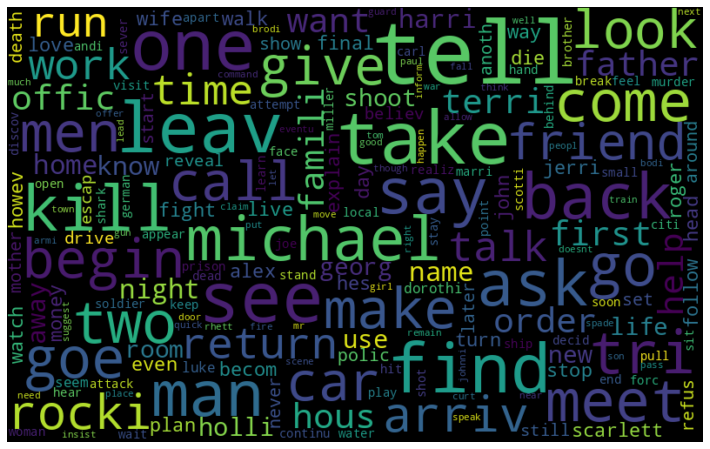

In [ ]:
# visualize the frequent words

all_words = " ".join([sentence for sentence in imdb['imdb_plot']])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

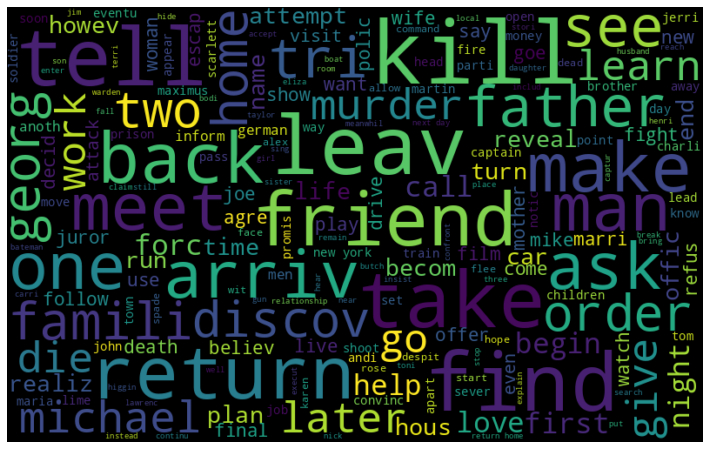

In [ ]:
# visualize the frequent words

all_words = " ".join([sentence for sentence in imdb['wiki_plot']])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Concatenate the 'imdb_plot' and 'wiki_plot' columns into a new column
imdb['combined_plot'] = imdb['imdb_plot'] + ' ' + imdb['wiki_plot']

# Set the name of the column you want to use
column_name = 'combined_plot'

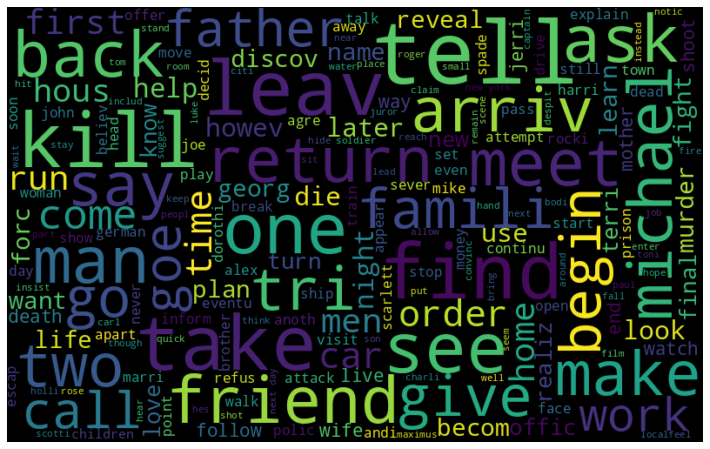

In [ ]:
# visualize the frequent words

all_words = " ".join([sentence for sentence in imdb['combined_plot']])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#Model Buliding

In [ ]:
#TFIDF
def get_recommendations(title, cosine_sim, indices):
    # Get the index of the movie that matches the title
    idx = indices[title]
    # Get the pairwsie similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the scores for 10 most similar movies
    sim_scores = sim_scores[1:11]
    # Get the movie indices
    talk_indices = [i[0] for i in sim_scores]
    # Return the top 10 most similar movies
    return imdb['title'].iloc[talk_indices]

In [ ]:
indices = pd.Series(imdb.index, index=imdb['title']).drop_duplicates()
plot1 = imdb['wiki_plot']

In [ ]:
from sklearn.metrics.pairwise import linear_kernel
tfidf = TfidfVectorizer(stop_words='english')

# Construct the TF-IDF matrix
tfidf_matrix = tfidf.fit_transform(plot1)

# Generate the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Generate recommendations
print(get_recommendations('The Shawshank Redemption', cosine_sim, indices))

35           From Here to Eternity
58                      Goodfellas
24    The Bridge on the River Kwai
84                     Taxi Driver
75                  The Green Mile
2                 Schindler's List
63           It Happened One Night
57                     The Pianist
17              The Sound of Music
22        The Silence of the Lambs
Name: title, dtype: object


In [ ]:
import os
os.environ['LC_ALL'] = 'en_US.UTF-8'

In [ ]:
pip install beautifulsoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install lxml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Preparing the dataset
all_words = [nltk.word_tokenize(sent) for sent in imdb['wiki_plot']]
# Removing Stop Words
from nltk.corpus import stopwords
for i in range(len(all_words)):
  imdb['wiki_plot'] = [str for str in imdb['wiki_plot'] if str not in stopwords.words('english')]

In [ ]:
from gensim.models import Word2Vec
word2vec = Word2Vec(all_words, min_count=100)

In [ ]:
vocabulary = word2vec.wv.vocab
vocabulary

{'day': <gensim.models.keyedvectors.Vocab at 0x7f28467c4e80>,
 'new': <gensim.models.keyedvectors.Vocab at 0x7f28460e8400>,
 'famili': <gensim.models.keyedvectors.Vocab at 0x7f284154d3a0>,
 'michael': <gensim.models.keyedvectors.Vocab at 0x7f284154d460>,
 'help': <gensim.models.keyedvectors.Vocab at 0x7f284154d430>,
 'tom': <gensim.models.keyedvectors.Vocab at 0x7f284155adc0>,
 'back': <gensim.models.keyedvectors.Vocab at 0x7f284155adf0>,
 'ask': <gensim.models.keyedvectors.Vocab at 0x7f284155ae50>,
 'two': <gensim.models.keyedvectors.Vocab at 0x7f284155aeb0>,
 'attempt': <gensim.models.keyedvectors.Vocab at 0x7f284155af10>,
 'men': <gensim.models.keyedvectors.Vocab at 0x7f284155af70>,
 'take': <gensim.models.keyedvectors.Vocab at 0x7f284155afd0>,
 'father': <gensim.models.keyedvectors.Vocab at 0x7f2845e59070>,
 'polic': <gensim.models.keyedvectors.Vocab at 0x7f2845e590d0>,
 'also': <gensim.models.keyedvectors.Vocab at 0x7f2845e59130>,
 'attack': <gensim.models.keyedvectors.Vocab at 0x

In [ ]:
v1 = word2vec.wv['help']

In [ ]:
sim_words = word2vec.wv.most_similar('help')
print(sim_words )

[('later', 0.9997906684875488), ('forc', 0.9997838735580444), ('men', 0.9997828006744385), ('two', 0.9997725486755371), ('arriv', 0.9997705221176147), ('realiz', 0.9997689127922058), ('kill', 0.9997639656066895), ('night', 0.9997637271881104), ('tell', 0.9997632503509521), ('meet', 0.9997619390487671)]


#WIKI plot


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec

# Set the name of the column you want to use
column_name = 'wiki_plot'

# Create a TfidfVectorizer object
tfidf = TfidfVectorizer()

# Generate the TF-IDF matrix for the selected column
tfidf_matrix = tfidf.fit_transform(imdb['wiki_plot'])

# Get the vocabulary from the TfidfVectorizer
tfidf_vocab = np.array(tfidf.get_feature_names_out())

# Limit the size of the Word2Vec vocabulary to the length of the combined matrix
combined_matrix_size = len(tfidf_vocab) + 100
w2v_model = Word2Vec([doc.split() for doc in imdb['wiki_plot']], min_count=1, size=100, max_vocab_size=combined_matrix_size - len(tfidf_vocab))

# Get the vocabulary from the Word2Vec model
w2v_vocab = list(w2v_model.wv.vocab)

# Initialize a matrix of zeros
combined_matrix = np.zeros((len(imdb), combined_matrix_size))

# Fill in the TF-IDF part of the matrix
for i in range(len(imdb)):
    for j in range(len(tfidf_vocab)):
        combined_matrix[i][j] = tfidf_matrix[i, j]

# Fill in the Word2Vec part of the matrix
for i in range(len(imdb)):
    for j in range(len(w2v_vocab)):
        word = w2v_vocab[j]
        if word in imdb['wiki_plot'][i]:
            w2v_values = w2v_model[word]
            w2v_mean = np.mean(w2v_values, axis=0)
            combined_matrix[i][len(tfidf_vocab) + j] = w2v_mean

# Add the combined matrix as new columns to the dataframe
for i in range(len(tfidf_vocab)):
    col_name = 'tfidf_' + tfidf_vocab[i]
    imdb[col_name] = combined_matrix[:, i]
for i in range(len(w2v_vocab)):
    col_name = 'w2v_' + w2v_vocab[i]
    imdb[col_name] = combined_matrix[:, len(tfidf_vocab) + i]

# Save the updated dataframe to a new file
imdb.to_csv('updated_data.csv', index=False)


In [ ]:
!python -m spacy download en_core_web_md

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-03-04 06:45:15.629158: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-04 06:45:15.629242: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-04 06:45:15.629265: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentione

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy

# Load the updated dataframe with TF-IDF and Word2Vec features
imdb = pd.read_csv('updated_data.csv')

# Set the name of the columns you want to use
tfidf_column_name = 'wiki_plot'
w2v_column_name = 'wiki_plot'

# Get user input for the sentence
user_input = input("Enter a sentence to find related movies: ")

# Compute the cosine similarity between the TF-IDF features of the input sentence and all movies in the dataframe
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(imdb[tfidf_column_name])
tfidf_input_matrix = tfidf.transform([user_input])
similarity_matrix_tfidf = cosine_similarity(tfidf_input_matrix, tfidf_matrix)

# Compute the Word2Vec vectors for all movies in the dataframe
nlp = spacy.load('en_core_web_md')
w2v_matrix = imdb[w2v_column_name].apply(lambda x: nlp(x).vector).tolist()

# Compute the Word2Vec vector for the input sentence and the cosine similarity between the input and all movie vectors
input_doc = nlp(user_input)
w2v_input = input_doc.vector.tolist()
similarity_matrix_w2v = cosine_similarity([w2v_input], w2v_matrix)

# Combine the similarity matrices from TF-IDF and Word2Vec with equal weights
similarity_matrix = (similarity_matrix_tfidf + similarity_matrix_w2v) / 2

# Get the indices of the 10 most similar movies to the input sentence
most_similar_indices = similarity_matrix.mean(axis=0).argsort()[::-1][:10]

# Get the movie titles of the 10 most similar movies
recommended_movies = imdb.iloc[most_similar_indices]['title'].values

# Print the recommended movie titles
print(f"Recommended movies related to '{user_input}' are:")
for movie in recommended_movies:
    print(movie)


Enter a sentence to find related movies: a romcom movie
Recommended movies related to 'a romcom movie' are:
Singin' in the Rain
Sunset Blvd.
Tootsie
Gandhi
Rebel Without a Cause
An American in Paris
Amadeus
To Kill a Mockingbird
Rocky
Annie Hall


#IMDB plot

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec

# Set the name of the column you want to use
column_name = 'imdb_plot'

# Create a TfidfVectorizer object
tfidf = TfidfVectorizer()

# Generate the TF-IDF matrix for the selected column
tfidf_matrix = tfidf.fit_transform(imdb['imdb_plot'])

# Get the vocabulary from the TfidfVectorizer
tfidf_vocab = np.array(tfidf.get_feature_names_out())

# Limit the size of the Word2Vec vocabulary to the length of the combined matrix
combined_matrix_size = len(tfidf_vocab) + 100
w2v_model = Word2Vec([doc.split() for doc in imdb['imdb_plot']], min_count=1, size=100, max_vocab_size=combined_matrix_size - len(tfidf_vocab))

# Get the vocabulary from the Word2Vec model
w2v_vocab = list(w2v_model.wv.vocab)

# Initialize a matrix of zeros
combined_matrix = np.zeros((len(imdb), combined_matrix_size))

# Fill in the TF-IDF part of the matrix
for i in range(len(imdb)):
    for j in range(len(tfidf_vocab)):
        combined_matrix[i][j] = tfidf_matrix[i, j]

# Fill in the Word2Vec part of the matrix
for i in range(len(imdb)):
    for j in range(len(w2v_vocab)):
        word = w2v_vocab[j]
        if word in imdb['imdb_plot'][i]:
            w2v_values = w2v_model[word]
            w2v_mean = np.mean(w2v_values, axis=0)
            combined_matrix[i][len(tfidf_vocab) + j] = w2v_mean

# Add the combined matrix as new columns to the dataframe
for i in range(len(tfidf_vocab)):
    col_name = 'tfidf_' + tfidf_vocab[i]
    imdb[col_name] = combined_matrix[:, i]
for i in range(len(w2v_vocab)):
    col_name = 'w2v_' + w2v_vocab[i]
    imdb[col_name] = combined_matrix[:, len(tfidf_vocab) + i]

# Save the updated dataframe to a new file
imdb.to_csv('updated_data1.csv', index=False)


In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy

# Load the updated dataframe with TF-IDF and Word2Vec features
imdb = pd.read_csv('updated_data1.csv')

# Set the name of the columns you want to use
tfidf_column_name = 'imdb_plot'
w2v_column_name = 'imdb_plot'

# Get user input for the sentence
user_input = input("Enter a sentence to find related movies: ")

# Compute the cosine similarity between the TF-IDF features of the input sentence and all movies in the dataframe
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(imdb[tfidf_column_name])
tfidf_input_matrix = tfidf.transform([user_input])
similarity_matrix_tfidf = cosine_similarity(tfidf_input_matrix, tfidf_matrix)

# Compute the Word2Vec vectors for all movies in the dataframe
nlp = spacy.load('en_core_web_md')
w2v_matrix = imdb[w2v_column_name].apply(lambda x: nlp(x).vector).tolist()

# Compute the Word2Vec vector for the input sentence and the cosine similarity between the input and all movie vectors
input_doc = nlp(user_input)
w2v_input = input_doc.vector.tolist()
similarity_matrix_w2v = cosine_similarity([w2v_input], w2v_matrix)

# Combine the similarity matrices from TF-IDF and Word2Vec with equal weights
similarity_matrix = (similarity_matrix_tfidf + similarity_matrix_w2v) / 2

# Get the indices of the 10 most similar movies to the input sentence
most_similar_indices = similarity_matrix.mean(axis=0).argsort()[::-1][:10]

# Get the movie titles of the 10 most similar movies
recommended_movies = imdb.iloc[most_similar_indices]['title'].values

# Print the recommended movie titles
print(f"Recommended movies related to '{user_input}' are:")
for movie in recommended_movies:
    print(movie)


Enter a sentence to find related movies: a romcom movie
Recommended movies related to 'a romcom movie' are:
Singin' in the Rain
Sunset Blvd.
An American in Paris
Annie Hall
Amadeus
A Streetcar Named Desire
Rebel Without a Cause
Nashville
A Clockwork Orange
Casablanca


#combining IMDB and WIKI plot

In [ ]:
combined_matrix_size = len(tfidf_vocab) + 100

In [ ]:
combined_matrix_size = len(set(" ".join(imdb['combined_plot']).split())) + 100

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec

# Concatenate the 'imdb_plot' and 'wiki_plot' columns into a new column
imdb['combined_plot'] = imdb['imdb_plot'] + ' ' + imdb['wiki_plot']

# Set the name of the column you want to use
column_name = 'combined_plot'

# Create a TfidfVectorizer object
tfidf = TfidfVectorizer()

# Generate the TF-IDF matrix for the selected column
tfidf_matrix = tfidf.fit_transform(imdb[column_name])

# Get the vocabulary from the TfidfVectorizer
tfidf_vocab = np.array(tfidf.get_feature_names_out())

# Limit the size of the Word2Vec vocabulary to the length of the combined matrix
combined_matrix_size = len(tfidf_vocab) + 10000  # Increase the size of the matrix
w2v_model = Word2Vec([doc.split() for doc in imdb[column_name]], min_count=1, size=100, max_vocab_size=combined_matrix_size - len(tfidf_vocab))

# Get the vocabulary from the Word2Vec model
w2v_vocab = list(w2v_model.wv.vocab)

# Initialize a matrix of zeros with the new size
combined_matrix = np.zeros((len(imdb), combined_matrix_size))

# Fill in the TF-IDF part of the matrix
for i in range(len(imdb)):
    for j in range(len(tfidf_vocab)):
        combined_matrix[i][j] = tfidf_matrix[i, j]

# Fill in the Word2Vec part of the matrix
for i in range(len(imdb)):
    for j in range(len(w2v_vocab)):
        word = w2v_vocab[j]
        if word in imdb[column_name][i]:
            w2v_values = w2v_model[word]
            w2v_mean = np.mean(w2v_values, axis=0)
            combined_matrix[i][len(tfidf_vocab) + j] = w2v_mean

# Add the combined matrix as new columns to the dataframe
for i in range(len(tfidf_vocab)):
    col_name = 'tfidf_' + tfidf_vocab[i]
    imdb[col_name] = combined_matrix[:, i]
for i in range(len(w2v_vocab)):
    col_name = 'w2v_' + w2v_vocab[i]
    imdb[col_name] = combined_matrix[:, len(tfidf_vocab) + i]

# Save the updated dataframe to a new file
imdb.to_csv('updated_data_2.csv', index=False)


In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy

# Load the updated dataframe with TF-IDF and Word2Vec features
imdb = pd.read_csv('updated_data_2.csv')

# Set the name of the columns you want to use
tfidf_column_name = 'combined_plot'
w2v_column_name = 'combined_plot'

# Get user input for the sentence
user_input = input("Enter a sentence to find related movies: ")

# Compute the cosine similarity between the TF-IDF features of the input sentence and all movies in the dataframe
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(imdb[tfidf_column_name])
tfidf_input_matrix = tfidf.transform([user_input])
similarity_matrix_tfidf = cosine_similarity(tfidf_input_matrix, tfidf_matrix)

# Compute the Word2Vec vectors for all movies in the dataframe
nlp = spacy.load('en_core_web_md')
w2v_matrix = imdb[w2v_column_name].apply(lambda x: nlp(x).vector).tolist()

# Compute the Word2Vec vector for the input sentence and the cosine similarity between the input and all movie vectors
input_doc = nlp(user_input)
w2v_input = input_doc.vector.tolist()
similarity_matrix_w2v = cosine_similarity([w2v_input], w2v_matrix)

# Combine the similarity matrices from TF-IDF and Word2Vec with equal weights
similarity_matrix = (similarity_matrix_tfidf + similarity_matrix_w2v) / 2

# Get the indices of the 10 most similar movies to the input sentence
most_similar_indices = similarity_matrix.mean(axis=0).argsort()[::-1][:10]

# Get the movie titles of the 10 most similar movies
recommended_movies = imdb.iloc[most_similar_indices]['title'].values

# Print the recommended movie titles
print(f"Recommended movies related to '{user_input}' are:")
for movie in recommended_movies:
    print(movie)


Enter a sentence to find related movies: a romcom movie
Recommended movies related to 'a romcom movie' are:
Singin' in the Rain
Sunset Blvd.
An American in Paris
Gandhi
Amadeus
Rebel Without a Cause
Annie Hall
The Good, the Bad and the Ugly
The Apartment
Nashville


#TFIDF

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer



# Concatenate the 'imdb_plot' and 'wiki_plot' columns into a new column
imdb['combined_plot'] = imdb['imdb_plot'] + ' ' + imdb['wiki_plot']

# Set the name of the column you want to use
column_name = 'combined_plot'

# Create a TfidfVectorizer object
tfidf = TfidfVectorizer()

# Generate the TF-IDF matrix for the selected column
tfidf_matrix = tfidf.fit_transform(imdb[column_name])

tfidf_matrix = tfidf.fit_transform(imdb[column_name])

# Get the vocabulary from the TfidfVectorizer
tfidf_vocab = np.array(tfidf.get_feature_names_out())


# Initialize a matrix of zeros with the new size
combined_matrix = np.zeros((len(imdb), len(tfidf_vocab)))

# Fill in the TF-IDF part of the matrix
for i in range(len(imdb)):
    for j in range(len(tfidf_vocab)):
        combined_matrix[i][j] = tfidf_matrix[i, j]

# Add the combined matrix as new columns to the dataframe
for i in range(len(tfidf_vocab)):
    col_name = 'tfidf_' + tfidf_vocab[i]
    imdb[col_name] = combined_matrix[:, i]

# Save the updated dataframe to a new file
imdb.to_csv('updated_data_tfidf.csv', index=False)


In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the updated dataframe with TF-IDF features
imdb = pd.read_csv('updated_data_tfidf.csv')

# Set the name of the column you want to use
tfidf_column_name = 'combined_plot'

# Get user input for the sentence
user_input = input("Enter a sentence to find related movies: ")

# Compute the cosine similarity between the TF-IDF features of the input sentence and all movies in the dataframe
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(imdb[tfidf_column_name])
tfidf_input_matrix = tfidf.transform([user_input])
similarity_matrix = cosine_similarity(tfidf_input_matrix, tfidf_matrix)

# Get the indices of the 10 most similar movies to the input sentence
most_similar_indices = similarity_matrix.mean(axis=0).argsort()[::-1][:10]

# Get the movie titles of the 10 most similar movies
recommended_movies = imdb.iloc[most_similar_indices]['title'].values

# Print the recommended movie titles
print(f"Recommended movies related to '{user_input}' are:")
for movie in recommended_movies:
    print(movie)


Enter a sentence to find related movies: a romcom movie
Recommended movies related to 'a romcom movie' are:
North by Northwest
The Silence of the Lambs
The Bridge on the River Kwai
Singin' in the Rain
It's a Wonderful Life
Some Like It Hot
12 Angry Men
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb
Amadeus
Apocalypse Now


#Word2Vector

In [ ]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec

# Concatenate the 'imdb_plot' and 'wiki_plot' columns into a new column
imdb['combined_plot'] = imdb['imdb_plot'] + ' ' + imdb['wiki_plot']

# Set the name of the column you want to use
column_name = 'combined_plot'

# Limit the size of the Word2Vec vocabulary to the length of the combined matrix
combined_matrix_size = 10000
w2v_model = Word2Vec([doc.split() for doc in imdb[column_name]], min_count=1, size=100, max_vocab_size=combined_matrix_size)

# Get the vocabulary from the Word2Vec model
w2v_vocab = list(w2v_model.wv.vocab)

# Initialize a matrix of zeros with the new size
combined_matrix = np.zeros((len(imdb), combined_matrix_size))

# Fill in the Word2Vec part of the matrix
for i in range(len(imdb)):
    for j in range(len(w2v_vocab)):
        word = w2v_vocab[j]
        if word in imdb[column_name][i]:
            w2v_values = w2v_model[word]
            w2v_mean = np.mean(w2v_values, axis=0)
            combined_matrix[i][j] = w2v_mean

# Add the combined matrix as new columns to the dataframe
for i in range(len(w2v_vocab)):
    col_name = 'w2v_' + w2v_vocab[i]
    imdb[col_name] = combined_matrix[:, i]

# Save the updated dataframe to a new file
imdb.to_csv('updated_data_w2v.csv', index=False)


In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import spacy

# Load the updated dataframe with Word2Vec features
imdb = pd.read_csv('updated_data_w2v.csv')

# Set the name of the column you want to use
w2v_column_name = 'combined_plot'

# Get user input for the sentence
user_input = input("Enter a sentence to find related movies: ")

# Compute the Word2Vec vectors for all movies in the dataframe
nlp = spacy.load('en_core_web_md')
w2v_matrix = imdb[w2v_column_name].apply(lambda x: nlp(x).vector).tolist()

# Compute the Word2Vec vector for the input sentence and the cosine similarity between the input and all movie vectors
input_doc = nlp(user_input)
w2v_input = input_doc.vector.tolist()
similarity_matrix_w2v = cosine_similarity([w2v_input], w2v_matrix)

# Get the indices of the 10 most similar movies to the input sentence
most_similar_indices = similarity_matrix_w2v.mean(axis=0).argsort()[::-1][:10]

# Get the movie titles of the 10 most similar movies
recommended_movies = imdb.iloc[most_similar_indices]['title'].values

# Print the recommended movie titles
print(f"Recommended movies related to '{user_input}' are:")
for movie in recommended_movies:
    print(movie)


Enter a sentence to find related movies: a romcom movie
Recommended movies related to 'a romcom movie' are:
Singin' in the Rain
Sunset Blvd.
An American in Paris
Gandhi
Amadeus
Rebel Without a Cause
Annie Hall
The Good, the Bad and the Ugly
The Apartment
Nashville
